In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
test_df = pd.read_csv("/kaggle/input/playground-series-s3e13/test.csv")

### Exploratory Data Analysis

In [3]:
train_df.sample(5)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
380,380,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chikungunya
359,359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yellow_Fever
351,351,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West_Nile_fever
617,617,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Japanese_encephalitis
379,379,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dengue


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [5]:
train_df.isna().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 66, dtype: int64

In [6]:
train_df.describe(include='all')

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West_Nile_fever
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117,NaN
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [7]:
disease_counts = train_df['prognosis'].value_counts()
print("Diseases in the dataset:")
print(disease_counts)

Diseases in the dataset:
West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64


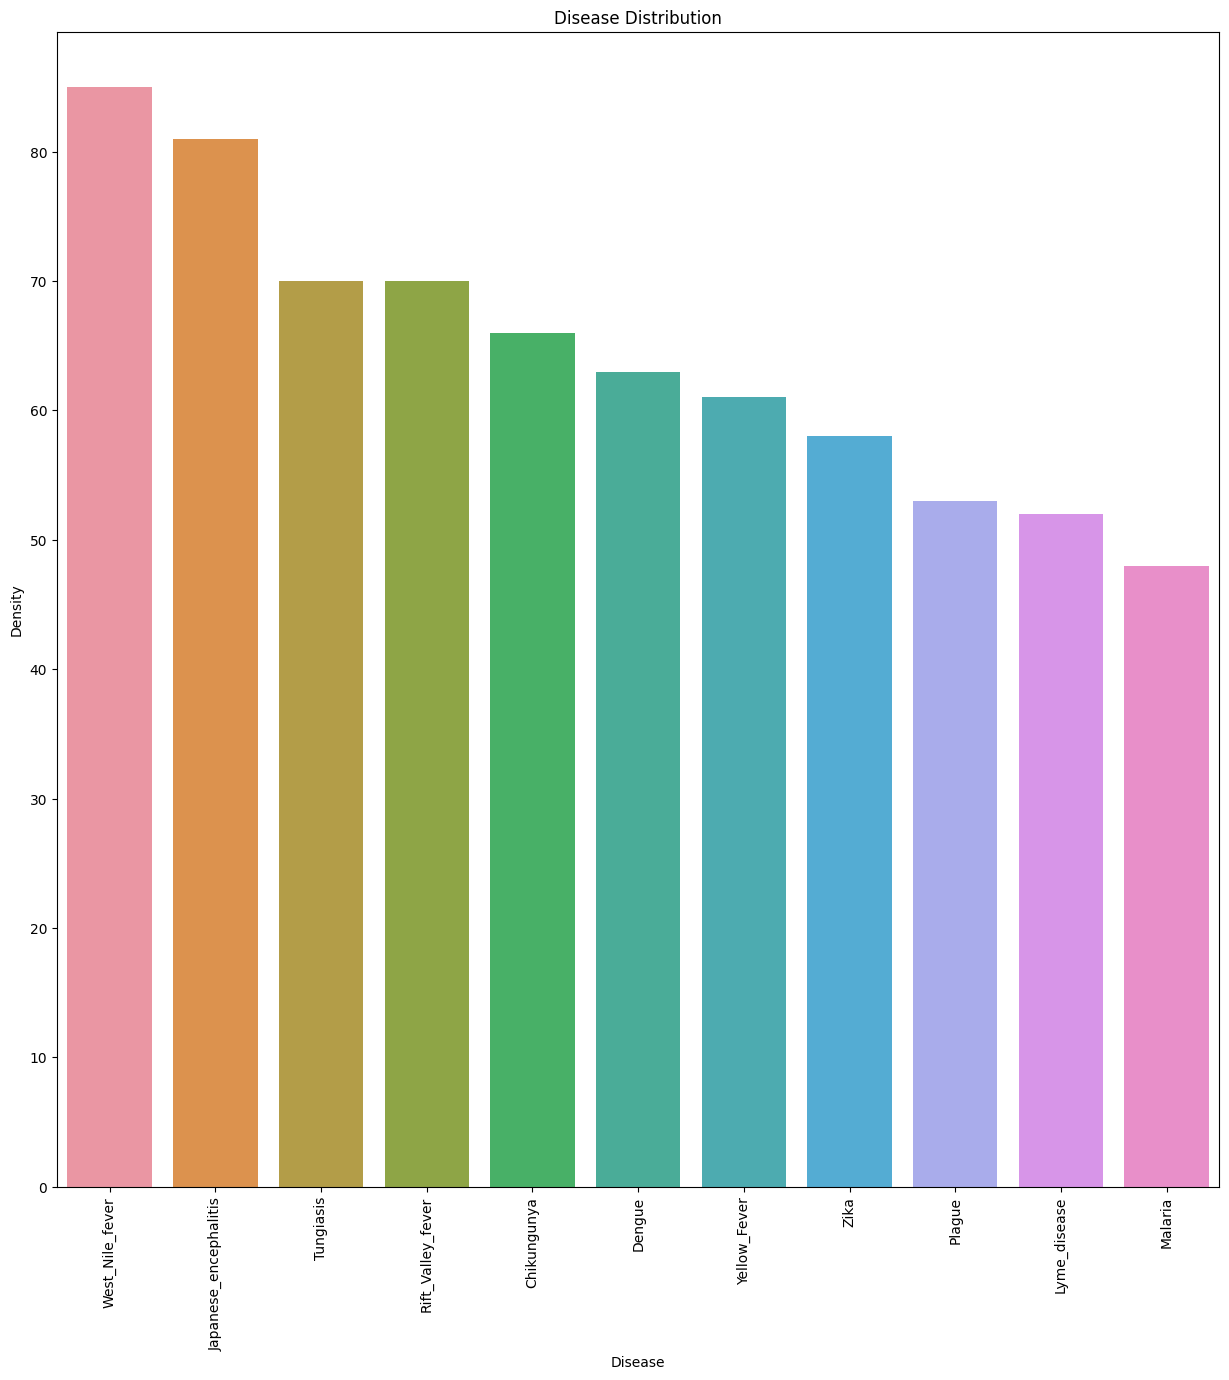

In [8]:
plt.figure(figsize=(15,15))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xlabel('Disease')
plt.ylabel('Density')
plt.title('Disease Distribution')
plt.xticks(rotation=90)
plt.show()

<Figure size 2400x2400 with 0 Axes>

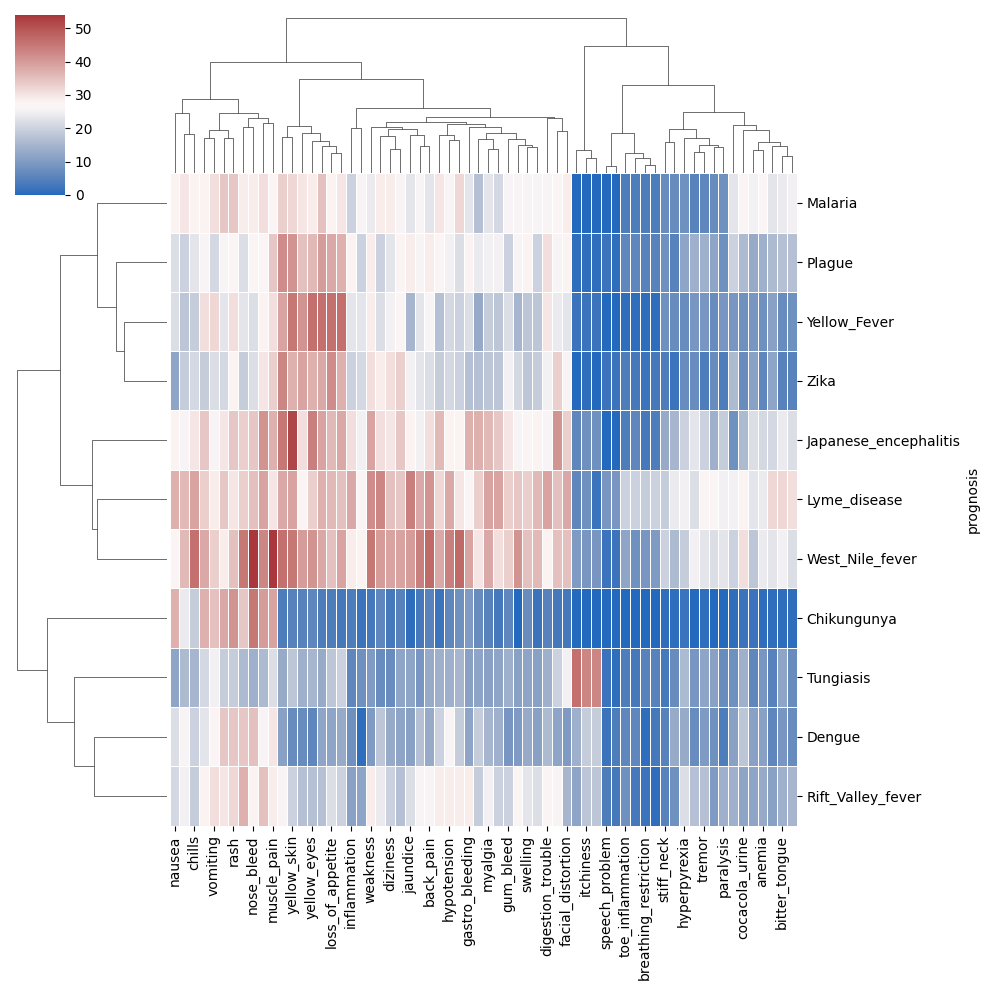

In [9]:
temp_data = train_df.drop('id', axis=1)  # Dropping the 'id' column for the heatmap to work properly
symptoms_by_disease = temp_data.groupby('prognosis').sum()

plt.figure(figsize=(24, 24))
sns.clustermap(symptoms_by_disease, cmap='vlag', linewidths=0.5)
plt.show()

In [10]:
# for col in train_df.select_dtypes(include='number').columns:
#     plt.figure()
#     sns.kdeplot(train_df[col], color='blue', label='train', fill=False)
#     sns.kdeplot(test_df[col], color='red', label='test', fill=False)
#     plt.title(col)
#     plt.xlabel('Value')
#     plt.ylabel('Density')
#     plt.xlim(0, 1)
#     plt.legend()
#     plt.show()


In [11]:
test_df.head(4)


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training of the Data 

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier


In [13]:
print(len(train_df.columns))
enc = LabelEncoder()
train_df['prognosis_enc'] = enc.fit_transform(train_df['prognosis'])
print(len(train_df.columns))
train_df.head()

66
67


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,prognosis_enc
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,3
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,7
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,3
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,10
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,6


In [14]:
train_df['prognosis_enc'].value_counts()

8     85
2     81
7     70
6     70
0     66
1     63
9     61
10    58
5     53
3     52
4     48
Name: prognosis_enc, dtype: int64

In [15]:
X = train_df.drop(['prognosis', 'prognosis_enc'], axis=1)
y = train_df['prognosis_enc']

In [16]:
print(X)
print(y)

      id  sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  \
0      0           1.0       1.0          0.0         1.0          1.0   
1      1           0.0       0.0          0.0         0.0          0.0   
2      2           0.0       1.0          1.0         1.0          0.0   
3      3           0.0       0.0          1.0         1.0          1.0   
4      4           0.0       0.0          0.0         0.0          0.0   
..   ...           ...       ...          ...         ...          ...   
702  702           0.0       0.0          1.0         1.0          1.0   
703  703           1.0       0.0          1.0         1.0          1.0   
704  704           1.0       0.0          1.0         0.0          1.0   
705  705           1.0       1.0          0.0         0.0          1.0   
706  706           1.0       1.0          0.0         0.0          0.0   

     joint_pain  vomiting  rash  diarrhea  ...  lymph_swells  \
0           1.0       1.0   0.0       1.0  ... 

In [17]:
X_test = test_df.drop(['id'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((530, 65), (177, 65), (530,), (177,))

In [19]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

class Pipeline:
    def __init__(self, model='XGB', **kwargs):
        self.model_type = model
        self.model = self.get_model(model, **kwargs)

    def get_model(self, model, **kwargs):
        models = {
            'Decision Tree': DecisionTreeClassifier,
            'CatBoost': CatBoostClassifier,
            'Random Forest': RandomForestClassifier,
            'KNN': KNeighborsClassifier
        }
        if model not in models:
            raise ValueError("Invalid model type")
        return models[model](**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        self.y_train_pred = self.model.predict(X)

    def predict(self, X):
        return self.model.predict(X)

    def accuracy(self, y_true):
        return accuracy_score(y_true, self.y_train_pred)

In [20]:
# Models and their respective hyperparameters
models = {
    'Decision Tree': {'max_depth': 5},
    'CatBoost': {'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'MultiClass', 'eval_metric': 'MultiClass', 'depth': 2},
    'Random Forest': {'n_estimators': 100,'max_depth': 5,'min_samples_leaf': 1,'random_state': 42},
    'KNN': {'n_neighbors': 5}
}


In [21]:
# Train and evaluate models
best_model = None
best_accuracy = 0.0

for model_name, params in models.items():
    print(f"Training {model_name}...")
    pipeline = Pipeline(model=model_name, **params)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = pipeline.accuracy(y_train)
    print(f"Accuracy for {model_name}: {accuracy}")
    print("----------------------------------------")

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"The best model is {best_model} with accuracy {best_accuracy}")

Training Decision Tree...
Accuracy for Decision Tree: 0.4018867924528302
----------------------------------------
Training CatBoost...
0:	learn: 2.3944453	total: 60.4ms	remaining: 1m
1:	learn: 2.3920256	total: 63.4ms	remaining: 31.6s
2:	learn: 2.3884876	total: 66.4ms	remaining: 22.1s
3:	learn: 2.3852845	total: 68.5ms	remaining: 17.1s
4:	learn: 2.3820443	total: 71.4ms	remaining: 14.2s
5:	learn: 2.3789029	total: 73.3ms	remaining: 12.1s
6:	learn: 2.3767240	total: 75.2ms	remaining: 10.7s
7:	learn: 2.3739288	total: 77ms	remaining: 9.55s
8:	learn: 2.3711220	total: 81.2ms	remaining: 8.95s
9:	learn: 2.3679781	total: 84.1ms	remaining: 8.32s
10:	learn: 2.3647108	total: 86.5ms	remaining: 7.77s
11:	learn: 2.3615035	total: 88.3ms	remaining: 7.27s
12:	learn: 2.3589025	total: 90.4ms	remaining: 6.87s
13:	learn: 2.3576233	total: 92.5ms	remaining: 6.51s
14:	learn: 2.3556573	total: 94.6ms	remaining: 6.21s
15:	learn: 2.3524152	total: 96.4ms	remaining: 5.93s
16:	learn: 2.3501099	total: 98.3ms	remaining: 5.

In [22]:
best_pipeline = Pipeline(model=best_model, **models[best_model])

# Fit the best model on the training data
best_pipeline.fit(X_train, y_train)

# Make predictions on test_df using the best model
test_predictions = best_pipeline.predict(test_df)

# Display the predicted labels
print("Predicted labels for test_df:")
print(test_predictions)

Predicted labels for test_df:
[ 0  0  2  2  8 10  2  0  9  8  1  6  6  0 10  2 10  7  0 10  3  9  2  4
  0  0  0  2  8  3 10  7  3  3  3  8 10 10  3  8  8  0  2  9  0  6  0  3
 10  7  6  0  3 10  6  3  0  0  1  7  8  8  3  0  7  3  2  8  0  7  7  8
  4  6  5  0  8  2  2  4 10  8  9  2  0  4  5  0  7  4  8  0  9  7  2  0
  3  8 10  8  3  8  3  6  7  0  2  2 10  4 10  7 10  7  8  8 10  0  7  8
  8  0  4  6  1 10  7  2  0  7  3  0  8  3  9  3  8  7  7  0  4  2  4  2
  8  0  7  3  2  9  0  7  4  9  0  3  7  0 10  0  8  0 10  0  0  4  4  0
  1  2  9 10  2 10  7  3  0  3  8  7  0  6  0  6  1  4  9  0  0  8  3  7
  2  9  9  9  9  3 10  3  6  0  0  9  8  1  2 10  5  7  4  6  8  3  0  0
  0 10  6  0  9  2  0  2  0  8  8  3  0  3  4  7 10  7  3  0  9  2  0  0
  2  0  7  2  3  1  3  8  7 10  8  0  7  8  0  9  8  8  4  3  3  3  8  7
  7 10  0  3  8  8 10  8  4  9 10  9  7  4  4  0  1  0  6  8  8 10  9  4
  1  0  7 10  8  0  8 10  9 10 10  4  3  2  8]


In [23]:
predictions_df = pd.DataFrame({'id': test_df['id'], 'prognosis': test_predictions})
print(predictions_df.tail(10))

       id  prognosis
293  1000          0
294  1001          8
295  1002         10
296  1003          9
297  1004         10
298  1005         10
299  1006          4
300  1007          3
301  1008          2
302  1009          8


In [24]:
# Save the predictions
test_df['prognosis'] = test_predictions
test_df[['id', 'prognosis']].to_csv('mypredictions.csv', index=False)
